<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-03-06-non-linear-self-starting-function-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

#  6. Self-starting Function

Self-starting functions in R are special functions used in non-linear regression models that make the fitting process easier. These functions provide initial parameter estimates that help the fitting algorithm converge more efficiently. Non-linear models often require good starting values for the parameters, and self-starting functions automate this process.



## Important Self-starting Functions

Self-starting functions in R automate the estimation of initial parameters for non-linear models, eliminating the need for manual specification. They are particularly useful in functions like `nls()` (non-linear least squares) where convergence heavily depends on starting values. Below are key self-starting functions, their descriptions, examples, and visualizations.

1. **SSlogis**: Self-starting logistic model.
2. **SSfpl**: Self-starting four-parameter logistic model.
3. **SSweibull**: Self-starting Weibull growth curve model.
4. **SSgompertz**: Self-starting Gompertz growth curve model.
5. **SSasymp**": Self-starting asymptotic regression model.
6. **SSmicmen**: Self-starting Michaelis-Menten model.

## Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314972 sha256=e8dae5d028d2ec393b979f1b6358fcd192ce8b8bc91eb3bd898c133ffd733fee
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Rrequired R Packages

In [3]:
%%R
# Packages List
packages <- c(
  "tidyverse",   # Includes readr, dplyr, ggplot2, etc.
  "nlme",        # For non-linear mixed-effects models
)

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [4]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
tidyverse      nlme 
     TRUE      TRUE 


## Load R Packages

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:nlme"      "package:lubridate" "package:forcats"  
 [4] "package:stringr"   "package:dplyr"     "package:purrr"    
 [7] "package:readr"     "package:tidyr"     "package:tibble"   
[10] "package:ggplot2"   "package:tidyverse" "package:tools"    
[13] "package:stats"     "package:graphics"  "package:grDevices"
[16] "package:utils"     "package:datasets"  "package:methods"  
[19] "package:base"     


## Logistic Growth Model: `SSlogis`

   - **Model**:  
   
   $y = \frac{Asym}{1 + e^{(xmid - x)/scal}} $
   
   - **Parameters**:  
     - `Asym`: Asymptote (maximum value).  
     - `xmid`: x-value at the inflection point.  
     - `scal`: Scale parameter (inverse of the growth rate).  



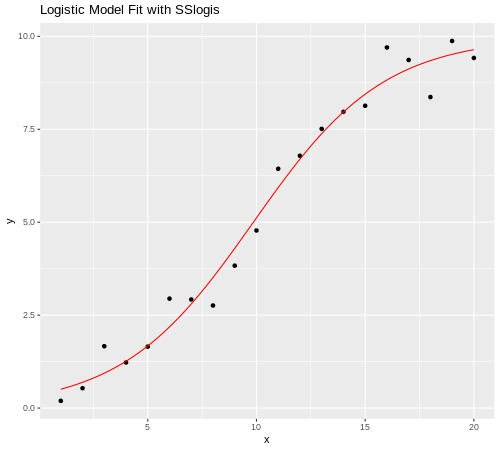

In [6]:
%%R -w 500 -h 450 -u px
   set.seed(123)
   x <- 1:20
   y <- SSlogis(x, Asym = 10, xmid = 10, scal = 3) + rnorm(20, sd = 0.5)
   df <- data.frame(x, y)

   fit <- nls(y ~ SSlogis(x, Asym, xmid, scal), data = df)
   summary(fit)

   # Predict and plot
   new_x <- data.frame(x = seq(1, 20, length.out = 100))
   new_y <- predict(fit, new_x)
   ggplot(df, aes(x, y)) +
     geom_point() +
     geom_line(data = data.frame(x = new_x$x, y = new_y), color = "red") +
     ggtitle("Logistic Model Fit with SSlogis")

## Four-Parameter Logistic Model: `SSfpl`

   - **Model**:  
   
     $y = A + \frac{B - A}{1 + (x/xmid)^scal}$  
     
   - **Parameters**:  
     - `A`: Lower asymptote.  
     - `B`: Upper asymptote.  
     - `xmid`: x-value at the inflection point.  
     - `scal`: Slope parameter.

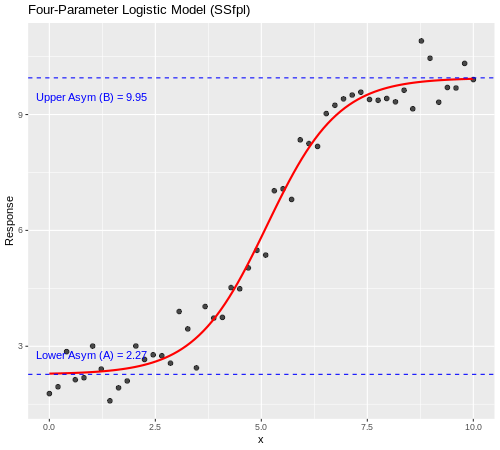

In [7]:
%%R -w 500 -h 450 -u px
set.seed(123)
x <- seq(0, 10, length.out = 50)
y <- SSfpl(x, A = 2, B = 10, xmid = 5, scal = 1) + rnorm(50, sd = 0.5)
df <- data.frame(x, y)

fit <- nls(y ~ SSfpl(x, A, B, xmid, scal), data = df)
summary(fit)

# Predict values for a smooth curve
new_x <- data.frame(x = seq(0, 10, length.out = 100))
pred_y <- predict(fit, newdata = new_x)

# Plot
ggplot(df, aes(x, y)) +
  geom_point(size = 2, alpha = 0.7) +
  geom_line(data = data.frame(x = new_x$x, y = pred_y),
            color = "red", linewidth = 1) +
  labs(
    title = "Four-Parameter Logistic Model (SSfpl)",
    x = "x",
    y = "Response"
  ) +
  geom_hline(yintercept = coef(fit)["A"], linetype = "dashed", color = "blue") +
  geom_hline(yintercept = coef(fit)["B"], linetype = "dashed", color = "blue") +
  annotate("text", x = 1, y = coef(fit)["A"] + 0.5,
           label = paste0("Lower Asym (A) = ", round(coef(fit)["A"], 2)), color = "blue") +
  annotate("text", x = 1, y = coef(fit)["B"] - 0.5,
           label = paste0("Upper Asym (B) = ", round(coef(fit)["B"], 2)), color = "blue")

## Weibull Growth Curve: `SSweibull`

   - **Model**:  
   
     $y = Asym - (Asym - Drop) e^{-exp((x - lrc) / pwr)}$  
     
   - **Parameters**:  
     - `Asym`: Asymptote.  
     - `Drop`: Drop parameter.  
     - `lrc`: Natural logarithm of the rate constant.  
     - `pwr`: Power parameter.


Key Parameters: 
Upper Asymptote (Asym): 99.57331 
Lower Asymptote: 17.51629 
Rate Constant (exp(lrc)): 0.1055008 
Power Parameter: 2.059132

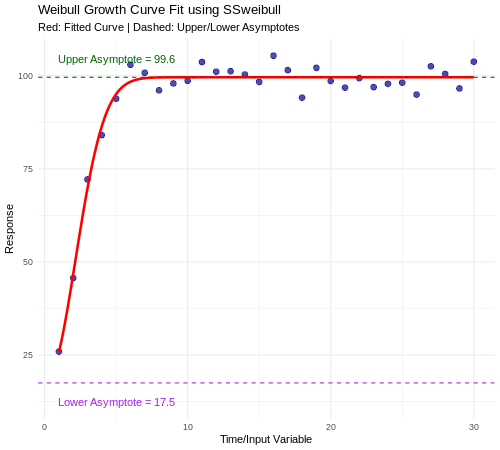

In [8]:
%%R -w 500 -h 450 -u px
# Set seed for reproducibility
set.seed(123)

# Simulate Weibull growth data
x <- 1:30
y <- SSweibull(x, Asym = 100, Drop = 80, lrc = log(0.1), pwr = 2) + rnorm(30, sd = 3)
df <- data.frame(x, y)

# Fit Weibull model using self-starting function
weibull_fit <- nls(y ~ SSweibull(x, Asym, Drop, lrc, pwr), data = df)

# Model summary and parameters
summary(weibull_fit)
cat("\nKey Parameters:",
    "\nUpper Asymptote (Asym):", coef(weibull_fit)["Asym"],
    "\nLower Asymptote:", coef(weibull_fit)["Asym"] - coef(weibull_fit)["Drop"],
    "\nRate Constant (exp(lrc)):", exp(coef(weibull_fit)["lrc"]),
    "\nPower Parameter:", coef(weibull_fit)["pwr"])

# Generate predictions for smooth curve
new_data <- data.frame(x = seq(1, 30, length.out = 300))
predicted <- predict(weibull_fit, newdata = new_data)

# Create visualization
ggplot(df, aes(x = x, y = y)) +
  geom_point(size = 2.5, alpha = 0.7, color = "darkblue") +
  geom_line(data = data.frame(x = new_data$x, y = predicted),
            color = "red", linewidth = 1.2) +
  geom_hline(yintercept = coef(weibull_fit)["Asym"],
             linetype = "dashed", color = "darkgreen") +
  geom_hline(yintercept = coef(weibull_fit)["Asym"] - coef(weibull_fit)["Drop"],
             linetype = "dashed", color = "purple") +
  annotate("text", x = 5, y = coef(weibull_fit)["Asym"] + 5,
           label = paste("Upper Asymptote =", round(coef(weibull_fit)["Asym"], 1)),
           color = "darkgreen") +
  annotate("text", x = 5, y = (coef(weibull_fit)["Asym"] - coef(weibull_fit)["Drop"]) - 5,
           label = paste("Lower Asymptote =",
                         round(coef(weibull_fit)["Asym"] - coef(weibull_fit)["Drop"], 1)),
           color = "purple") +
  labs(title = "Weibull Growth Curve Fit using SSweibull",
       subtitle = "Red: Fitted Curve | Dashed: Upper/Lower Asymptotes",
       x = "Time/Input Variable",
       y = "Response") +
  theme_minimal()

##  Gompertz Growth Model: `SSgompertz`

   - **Model**:  
   
     $y = Asym \cdot e^{-b_2 \cdot e^{-b_3 \cdot x}}$  
     
   - **Parameters**:  
     - `Asym`: Asymptote.  
     - `b2`: Displacement along the x-axis.  
     - `b3`: Growth rate.  

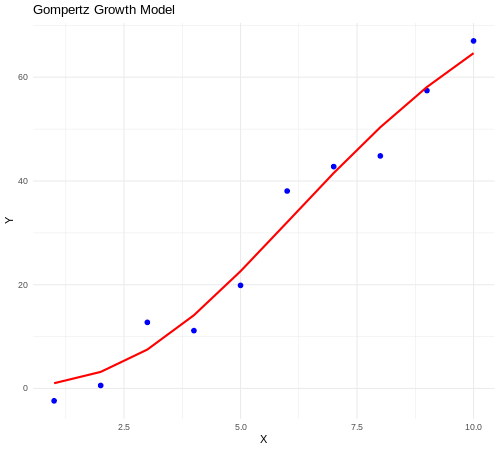

In [9]:
%%R -w 500 -h 450 -u px

# Create example data
set.seed(123)
x <- 1:10
y <- 100 * exp(-exp(2 - 0.3 * x)) + rnorm(10, sd = 5)
data <- data.frame(x = x, y = y)

# Fit the Gompertz Growth Model using SSgompertz
fit <- nls(y ~ SSgompertz(x, Asym, b2, b3), data = data)
summary(fit)

# Extract fitted values
data$fitted <- predict(fit)

# Plot the data and the fitted model using ggplot2
ggplot(data, aes(x = x, y = y)) +
  geom_point(color = 'blue', size = 2) +
  geom_line(aes(y = fitted), color = 'red', size = 1) +
  labs(title = "Gompertz Growth Model",
       x = "X",
       y = "Y") +
  theme_minimal()

## Asymptotic Regression: `SSasymp`

   - **Model**:  
   
     $y = Asym + (R_0 - Asym) e^{-e^{lrc} \cdot x}$  
     
   - **Parameters**:  
     - `Asym`: Horizontal asymptote.  
     - `R0`: y-intercept (at \(x = 0\)).  

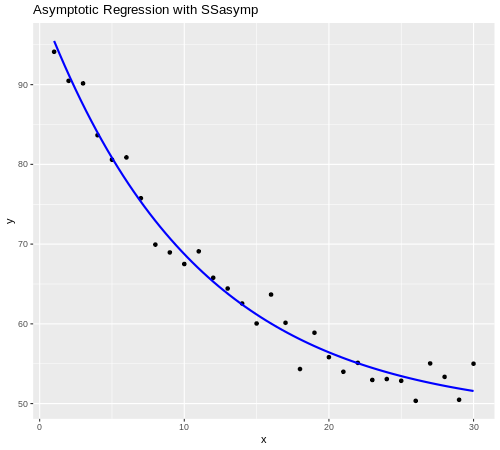

In [10]:
%%R -w 500 -h 450 -u px
set.seed(123)
   x <- 1:30
   y <- SSasymp(x, Asym = 50, R0 = 100, lrc = log(0.1)) + rnorm(30, sd = 2)
   df <- data.frame(x, y)

   fit <- nls(y ~ SSasymp(x, Asym, R0, lrc), data = df)
   summary(fit)

   # Plot
   ggplot(df, aes(x, y)) +
     geom_point() +
     geom_smooth(method = "nls", formula = y ~ SSasymp(x, Asym, R0, lrc),
                 se = FALSE, color = "blue") +
     ggtitle("Asymptotic Regression with SSasymp")


## Michaelis-Menten Model: `SSmicmen`

   - **Model**:  
   
    $y = \frac{V_m \cdot x}{K + x}$)  
   
   - **Parameters**:  
     - `Vm`: Maximum reaction rate.  
     - `K`: Substrate concentration at half of $V_m$.  


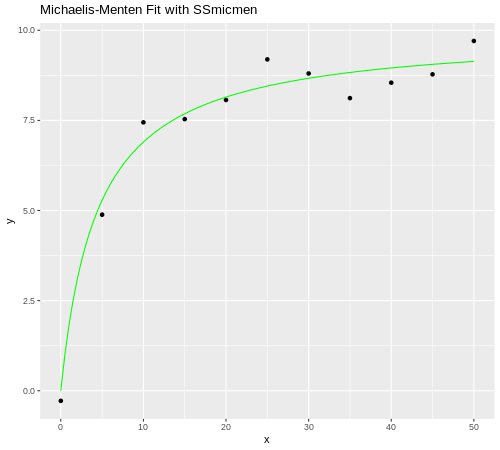

In [11]:
%%R -w 500 -h 450 -u px
set.seed(123)
x <- seq(0, 50, by = 5)
y <- SSmicmen(x, Vm = 10, K = 5) + rnorm(length(x), sd = 0.5)
df <- data.frame(x, y)

# Get reasonable starting values
Vm_start <- max(df$y) * 1.1  # Slightly above observed max
K_start <- median(df$x[df$y >= 0.5 * max(df$y)])  # x near half-maximal response

# Fit model
fit <- nls(
  y ~ SSmicmen(x, Vm, K),
  data = df,
  start = list(Vm = Vm_start, K = K_start),
  control = nls.control(warnOnly = TRUE)  # Show warnings instead of errors
)

# Check results
summary(fit)

# Plot
ggplot(df, aes(x, y)) +
     geom_point() +
     stat_function(fun = function(x) coef(fit)[1] * x / (coef(fit)[2] + x),
                   color = "green") +
     ggtitle("Michaelis-Menten Fit with SSmicmen")


## Summary and Conclusion

This tutorial explored the concept of self-starting functions in R, which are useful for fitting non-linear models. Self-starting functions provide initial parameter estimates that help the fitting algorithm converge more efficiently. We discussed several key self-starting functions, including the logistic model, four-parameter logistic model, Weibull growth curve, Gompertz growth model, asymptotic regression, and Michaelis-Menten model. For each function, we provided a brief description, example code, and visualization to demonstrate how to use them in practice. By leveraging self-starting functions, you can streamline the process of fitting non-linear models and obtain more reliable results.

## References

1. The-R Book by Michael J. Crawley

2. [A collection of self-starters for nonlinear regression in R](https://www.r-bloggers.com/2020/02/a-collection-of-self-starters-for-nonlinear-regression-in-r/) - This article on R-bloggers discusses various self-starting functions available in R and how they can be used to simplify non-linear regression analysis.

3. [Self-starting routines for nonlinear regression models](https://www.r-bloggers.com/2020/02/self-starting-routines-for-nonlinear-regression-models/) - Another article on R-bloggers that delves into self-starting routines provided by the `drc` package, useful for dose-response analyses and other biological processes.

4. [Some useful equations for nonlinear regression in R](https://www.statforbiology.com/nonlinearregression/usefulequations) - This resource on StatForBiology provides useful equations and discusses the convenience of using self-starting routines in non-linear regression models.

5. [Self-starting routines for nonlinear regression models](https://www.statforbiology.com/2020/stat_nls_selfstarting/) - This article on StatForBiology explains the benefits of using self-starting functions in R for fitting non-linear models, especially in biological research.




